## Klasifikasi Gambar

Kriteria : 
* Dataset : https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
* Dataset menjadi 60% Training 40% Validation (data training memiliki 1314 sampel, dan data validasi sebanyak 874 sampel).
* Terdapat augmentasi
* Menggunakan ImageDataGenerator
* Menggunakan model sequential
* Tidak boleh lebih dari 30 menit
* Akurasi minimal 85%
* Dapat memprediksi gambar yang diunggah
* Menambah data diri

## Data Diri

Nama : Imam Syahrizal <br>
Email : imsyahrizal10@gmail.com <br>
Username : imsyahrizal <br>

## Menghubungkan ke google drive : tujuannya karena dataset disimpan di google dirve, sehingga bisa mengulang-ulang proses pelatihan tanpa perlu menyiapkan ulang dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


masuk direktori kerja pada google drive

In [ ]:
%cd /content/drive/MyDrive/Dicoding/Machine Learning/Finish

/content/drive/MyDrive/Dicoding/Machine Learning/Finish


In [ ]:
pwd

'/content/drive/My Drive/Dicoding/Machine Learning/Finish'

## Mengunduh dataset dan hanya menyimpan data yang diperlukan (cukup sekali)




In [ ]:
!wget --no-check-certificate \
 https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
 -O /rockpaperscissors.zip

--2021-04-29 08:19:05--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/rockpaperscissors.zip’

/rockpaperscissors. 100%[===================>] 307.92M  1.23MB/s    in 4m 32s  

2021-04-29 08:23:38 (1.13 MB/s) - ‘/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
!mkdir dataset

In [ ]:
!unzip -u "/rockpaperscissors.zip" -d dataset

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: dataset/rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: dataset/__MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: dataset/rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: dataset/__MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: dataset/rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: dataset/__MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: dataset/rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: dataset/__MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: dataset/rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: dataset/__MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: dataset/rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: dataset/__MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: dataset/ro

In [ ]:
import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)

In [ ]:
list_files('dataset/')

/
rockpaperscissors/
    paper/
    rock/
    rps-cv-images/
        paper/
        rock/
        scissors/
    scissors/
__MACOSX/
    rockpaperscissors/
        paper/
        rock/
        rps-cv-images/
            paper/
            rock/
            scissors/
        scissors/


In [ ]:
!mkdir image

In [ ]:
import shutil
shutil.move("dataset/rockpaperscissors/paper/", "image/")
shutil.move("dataset/rockpaperscissors/rock/", "image/")
shutil.move("dataset/rockpaperscissors/scissors/", "image/")

'image/scissors'

In [ ]:
list_files('image/')

/
paper/
rock/
scissors/


## Membagi dataset menjadi train dan validation (cukup sekali)

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
paper_dir = 'image/paper'
rock_dir = 'image/rock'
scissors_dir = 'image/scissors'
print("Gambar kertas : ", len(os.listdir(paper_dir)))
print("Gambar batu : ", len(os.listdir(rock_dir)))
print("Gambar gunting : ", len(os.listdir(scissors_dir)))

Gambar kertas :  712
Gambar batu :  726
Gambar gunting :  750


In [ ]:
original_path = 'image'
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(original_path):
  for name in files:
    full_path.append(os.path.join(path, name))
    tag.append(path.split('/')[-1])
    file_name.append(name)

df = pd.DataFrame({"path":full_path, 'file_name':file_name, "tag":tag})
df.groupby(['tag']).size()

X= df['path']
y= df['tag']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=None)

df_tr = pd.DataFrame({'path':X_train,
                      'tag':y_train,
                      'set':'train'})

df_val = pd.DataFrame({'path':X_val,
                       'tag':y_val,
                       'set':'validation'})

print('train size :', len(df_tr))
print('validation size :', len(df_val))

train size : 1312
validation size : 876


In [ ]:
df_all = df_tr.append([df_val]).reset_index(drop=1)\

print(df_all.groupby(['set','tag']).size(),'\n')

set         tag     
train       paper       432
            rock        439
            scissors    441
validation  paper       280
            rock        287
            scissors    309
dtype: int64 



## Memasukkan dataset ke folder set masing-masing (cukup sekali)

In [ ]:
import shutil
from tqdm.notebook import tqdm as tq

datasource_path = "image/"
dataset_path = "dataset/"
shutil.rmtree(dataset_path) #menghapus folder unizip pdf
os.mkdir(dataset_path) #folder yang tadi digunakan untuk unzip dibuat lagi dan nanti digunakan sebagai tempat menyimpan dataset yang telah dikelompokkan

In [ ]:
for index, row in tq(df_all.iterrows()):
    
    #mendefinisikan path secara utuh dari masing-masing file
    file_path = row['path']
    if os.path.exists(file_path) == False:
        file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    #membuat folder destinasi apabila belum ada
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    #mendefinisikan destinasi yang tepat bagi setiap file
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    #menyalin file ke destinasi yang tepat
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

## Menyiapkan dataset yang berupa gambar sekaligus melakukan augmentasi data dengan ImageDataGenerator (dilakukan setiap runtime baru dijalankan)

In [ ]:
#folder dataset tersimpan
dataset_path = "dataset/"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=20,
                  horizontal_flip=True,
                  shear_range=0.2,
                  fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(
                      rescale=1./255,
                      rotation_range=20,
                      horizontal_flip=True,
                      shear_range=0.2,
                      fill_mode = 'nearest')

In [ ]:
train_gen = train_datagen.flow_from_directory(dataset_path+'train',
                                              target_size = (150, 150),
                                              batch_size=4,
                                              class_mode="categorical",
                                              shuffle=False,
                                              interpolation = 'bilinear'
                                              )

valid_gen = train_datagen.flow_from_directory(dataset_path+'validation',
                                              target_size = (150, 150),
                                              batch_size=4,
                                              class_mode="categorical",
                                              shuffle=False,
                                              interpolation = 'bilinear'
                                              )

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
#melihat pembagian kelas oleh ImageDataGenerator
print(valid_gen.class_indices)

{'paper': 0, 'rock': 1, 'scissors': 2}


In [ ]:
import tensorflow as tf
#menyiapkan data train dan validasi yang akan digunakan untuk evaluasi model (akurasi)
train_data = tf.data.Dataset.from_generator(lambda: train_gen,
                                            output_types = (tf.float32, tf.float32),
                                            output_shapes=([None
                                                           , 150, 150, 3]
                                                           , [None, train_gen.num_classes])       
                                            )

val_data = tf.data.Dataset.from_generator(lambda: valid_gen,
                                            output_types = (tf.float32, tf.float32),
                                            output_shapes=([None
                                                           , 150, 150, 3]
                                                           , [None, valid_gen.num_classes])       
                                            )

## Inisiasi library yang akan digunakan untuk melatih model

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import Adam, SGD

## Model
menggunakan optimizer Adam dengan learning rate 0.001 <br>
loss function categorical crossentropy <br>
keluaran adalah tiga buah prediksi untuk masing-masong kelas

In [ ]:
def cnn_sederhana():
  model = Sequential()
  model.add(Conv2D(16,3,padding='same',activation='relu',input_shape = (150, 150, 3)))
  model.add(MaxPool2D())
  model.add(Conv2D(32, 3, padding='same', activation='relu'))
  model.add(MaxPool2D())
  model.add(Conv2D(64, 3, padding='same', activation='relu'))
  model.add(MaxPool2D())
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  opt = Adam()
  model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

  return model

In [ ]:
model = cnn_sederhana()
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 20736)            

In [ ]:
#menyiapkan callbacks, yakni mengenai log dari training yang disimpan di latihan.log
from tensorflow.keras.callbacks import CSVLogger
csv_logger = CSVLogger('latihan.log')

In [ ]:
history = model.fit(
      train_gen,
      steps_per_epoch=40, 
      epochs=175, 
      validation_data=valid_gen, 
      validation_steps=5,
      callbacks=[csv_logger]) 

Epoch 1/175
40/40 [==============================] - 7s 149ms/step - loss: 1.2777 - accuracy: 0.3568 - val_loss: 1.0906 - val_accuracy: 0.0000e+00
Epoch 2/175
40/40 [==============================] - 6s 143ms/step - loss: 1.0996 - accuracy: 0.3089 - val_loss: 1.1140 - val_accuracy: 0.0000e+00
Epoch 3/175
40/40 [==============================] - 6s 144ms/step - loss: 1.0954 - accuracy: 0.3578 - val_loss: 0.8107 - val_accuracy: 0.9500
Epoch 4/175
40/40 [==============================] - 6s 142ms/step - loss: 1.0676 - accuracy: 0.3933 - val_loss: 1.0542 - val_accuracy: 0.8000
Epoch 5/175
40/40 [==============================] - 6s 142ms/step - loss: 1.0684 - accuracy: 0.5691 - val_loss: 0.6681 - val_accuracy: 1.0000
Epoch 6/175
40/40 [==============================] - 6s 144ms/step - loss: 0.8975 - accuracy: 0.6289 - val_loss: 1.1442 - val_accuracy: 0.4000
Epoch 7/175
40/40 [==============================] - 6s 142ms/step - loss: 0.6967 - accuracy: 0.6404 - val_loss: 0.4500 - val_accuracy

proses training diatas dijalankan tanpa mengaktifkan gpu di runtime diperlukan selama 1024 detik atau sekitar 17 menit

In [ ]:
lossV, accV = model.evaluate(val_data,steps=len(valid_gen),verbose=0)
print('Akurasi pada validasi dataset: {:.4f} \nLoss pada validasi dataset: {:.4f}'.format(accV,lossV),'\n')

lossT, accT = model.evaluate(train_data,steps=len(train_gen),verbose=0)
print('Akurasi pada training dataset: {:.4f} \nLoss pada training dataset: {:.4f}'.format(accT,lossT),'\n')

Akurasi pada validasi dataset: 0.9589 
Loss pada validasi dataset: 0.1956 

Akurasi pada training dataset: 0.9901 
Loss pada training dataset: 0.0380 



In [ ]:
#menyimpan model
model.save('model.h5')
model.save_weights('model_weights.h5')

## Visualisasi Evaluasi Model

In [ ]:
#inisisasi library yang digunakan untuk visualisasi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpmimg

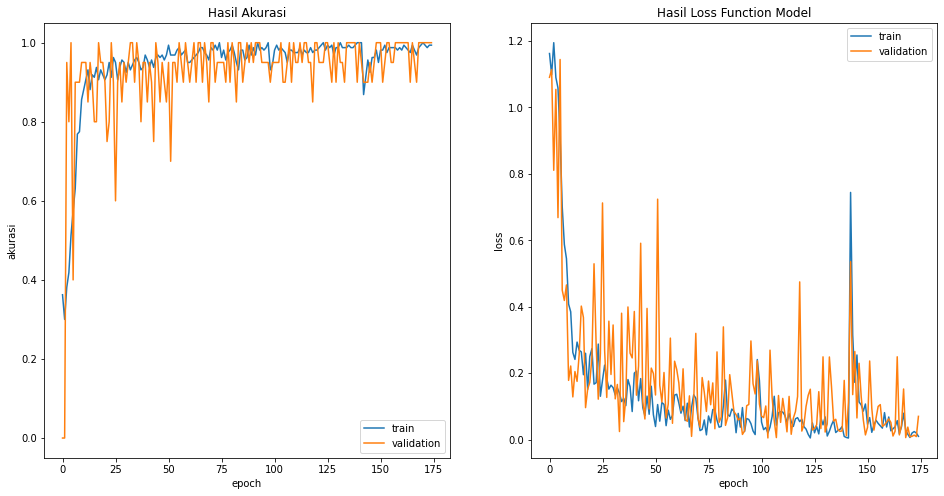

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Hasil Akurasi')
plt.ylabel('akurasi')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Hasil Loss Function Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Prediksi dengan model yang pernah dibuat

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpmimg
%matplotlib inline

In [ ]:
#jika ingin menggunakan model yang sudah disimpan
from keras.models import load_model
model = load_model('model.h5')
model.load_weights('model_weights.h5')

Saving 20210429_181719.jpg to 20210429_181719.jpg
Saving 20210429_181727.jpg to 20210429_181727.jpg
Saving 20210429_181811.jpg to 20210429_181811.jpg
Saving 20210429_181816.jpg to 20210429_181816.jpg
Saving 20210429_181822.jpg to 20210429_181822.jpg
Saving 20210429_181827.jpg to 20210429_181827.jpg


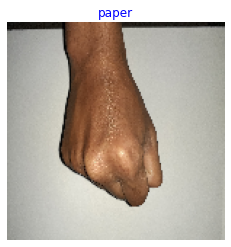

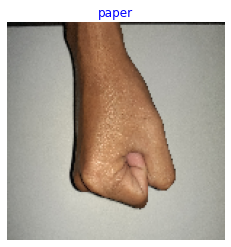

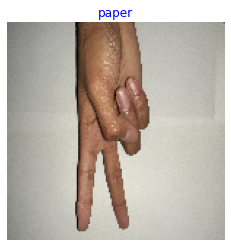

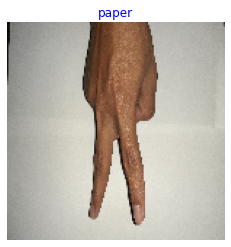

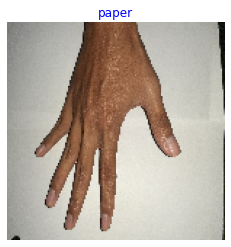

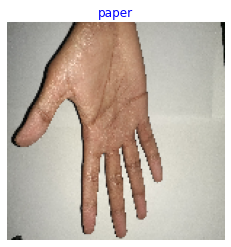

In [ ]:
uploaded = files.upload()

for n in uploaded.keys():

  path = n
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  cek =  np.argmax(classes, axis=1)

  if(cek[0] == 0):
    terprediksi = 'paper'
  elif(cek[0] == 1):
    terprediksi = 'rock'
  else:
    terprediksi = 'scissors'
  
  plt.imshow(img)
  plt.axis('off')
  plt.title(terprediksi,color='blue')
  plt.show()